In [1]:
# Load csv as pandas dataframe
import pandas as pd

# Load csv as pandas dataframe
cleanedPatternDf = pd.read_csv('Extracted Cleaned data of 2019 - 2024 chart patterns by Mr. Bulkowski.csv')
cleanedPatternDf.head()

,Symbol,Chart Pattern,Bullish/Bearish,Start,End,Industry
0,AIG,"Triangle, symmetrical",1,11/25/2019,1/7/2020,Insurance (Prop/Casualty)
1,ARCB,"Triangle, descending",-1,11/26/2019,1/8/2020,Trucking/Transp. Leasing
2,ACGL,Rising wedge,-1,11/27/2019,1/9/2020,Insurance (Prop/Casualty)
3,BBBY,Dead-cat bounce,-1,1/9/2020,1/9/2020,Retail (Special Lines)
4,CENX,"Double Top, Adam and Adam",-1,12/13/2019,1/7/2020,Metals and Mining (Div.)


In [2]:
cleanedPatternDf['Start'] = pd.to_datetime(cleanedPatternDf['Start'])
cleanedPatternDf['End'] = pd.to_datetime(cleanedPatternDf['End'])

# Data set Creation


In [3]:
#  get all the unique values in the Chart Pattern column 
uniquePatterns=cleanedPatternDf['Chart Pattern'].value_counts()
uniquePatterns.head(30)

Chart Pattern
Pipe bottom                     1147
Double Bottom, Adam and Adam     518
Pipe top                         497
Triangle, symmetrical            483
Ugly double bottom               465
Double Top, Adam and Adam        295
Head-and-shoulders bottom        291
Triple bottom                    280
Dead-cat bounce                  264
Head-and-shoulders top           263
Triple top                       262
Flag, high and tight             231
Double Bottom, Eve and Adam      208
Double Top, Eve and Eve          207
Double Top, Adam and Eve         197
Double Top, Eve and Adam         168
Double Bottom, Eve and Eve       160
Broadening top                   151
Diamond top                      138
Double Bottom, Adam and Eve      133
Three Rising Valleys             122
Broadening bottom                109
Triangle, ascending              108
Triangle, descending              86
Rectangle top                     80
Scallop, ascending                64
Horn top                

Selected Patterns

- Double Bottom, Adam and Adam : 518
- Triangle, symmetrical : 483
- Double Top, Adam and Adam : 295
- Double Bottom, Eve and Adam : 208
- Head-and-shoulders bottom : 291
- Head-and-shoulders top : 263
- Cup with handle : 61
- Flag, high and tight :231


In [4]:
filteredPatternDf = cleanedPatternDf[cleanedPatternDf['Chart Pattern'].isin(['Double Bottom, Adam and Adam', 'Triangle, symmetrical', 'Double Top, Adam and Adam', 'Double Bottom, Eve and Adam', 'Head-and-shoulders bottom', 'Head-and-shoulders top', 'Cup with handle','Flag, high and tight'])]

# print the un unique values in the Chart Pattern column
print(filteredPatternDf['Chart Pattern'].unique())

filteredPatternDf.head()

['Triangle, symmetrical' 'Double Top, Adam and Adam'
 'Double Bottom, Adam and Adam' 'Head-and-shoulders bottom'
 'Head-and-shoulders top' 'Flag, high and tight'
 'Double Bottom, Eve and Adam' 'Cup with handle']


,Symbol,Chart Pattern,Bullish/Bearish,Start,End,Industry
0,AIG,"Triangle, symmetrical",1,2019-11-25,2020-01-07,Insurance (Prop/Casualty)
4,CENX,"Double Top, Adam and Adam",-1,2019-12-13,2020-01-07,Metals and Mining (Div.)
5,CIEN,"Triangle, symmetrical",1,2019-12-13,2020-01-09,Telecom. Equipment
6,CNA,"Triangle, symmetrical",1,2019-12-03,2020-01-09,Insurance (Prop/Casualty)
7,WIRE,"Triangle, symmetrical",1,2019-11-11,2020-01-09,Metals and Mining (Div.)


# Test Train Split


In [5]:
#  split a 20% of each class in the Dataset Dataframe for testing  and 80% for training
from sklearn.model_selection import train_test_split

# Split the Dataset into training and testing sets
train, test = train_test_split(filteredPatternDf, test_size=0.2,random_state =6699, stratify=filteredPatternDf['Chart Pattern'])

# Display the shape of the training and testing sets
print(f'Training Set Shape: {train.shape}')
print(f'Testing Set Shape: {test.shape}')

# display the amount of data in each class in the train and test data
print("train data",train['Chart Pattern'].value_counts())
print("test data",test['Chart Pattern'].value_counts())



Training Set Shape: (1880, 6)
Testing Set Shape: (470, 6)
train data Chart Pattern
Double Bottom, Adam and Adam    414
Triangle, symmetrical           386
Double Top, Adam and Adam       236
Head-and-shoulders bottom       233
Head-and-shoulders top          211
Flag, high and tight            185
Double Bottom, Eve and Adam     166
Cup with handle                  49
Name: count, dtype: int64
test data Chart Pattern
Double Bottom, Adam and Adam    104
Triangle, symmetrical            97
Double Top, Adam and Adam        59
Head-and-shoulders bottom        58
Head-and-shoulders top           52
Flag, high and tight             46
Double Bottom, Eve and Adam      42
Cup with handle                  12
Name: count, dtype: int64


# Format dataset


In [6]:
pattern_encoding = {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}

def indexes_fix(dataset):
    print("Fixing indexes...")
    # Print the data types of two levels of the index
    print(dataset.index.get_level_values(0).dtype, dataset.index.get_level_values(1).dtype)

    # Change the data type of level 0 index to int
    dataset.index = dataset.index.set_levels(
        dataset.index.levels[0].astype('int'), level=0
    )

    # Print the data types after modification
    print(dataset.index.get_level_values(0).dtype, dataset.index.get_level_values(1).dtype)

    # Convert level 1 index to int64
    dataset.index = dataset.index.set_levels(
        dataset.index.levels[1].astype('int64'), level=1
    )


    # Print the data types after modification
    print(dataset.index.get_level_values(0).dtype, dataset.index.get_level_values(1).dtype)
    
    return dataset

def customOneHotEncode (dataset):
    print("One hot encoding...")
    patterns = dataset['Pattern'].unique()
    # Create a dictionary that maps each unique pattern to a unique integer
    # pattern_encoding = {pattern: idx for idx, pattern in enumerate(patterns)}
    # Print the pattern encoding dictionary
    print("Pattern Encoding Dictionary: ",pattern_encoding)
    
    # Encode the 'Pattern' column using the automatically generated encoding dictionary
    dataset['Pattern'] = dataset['Pattern'].map(pattern_encoding)
    
    # Check for any NaN values in the encoded test dataset (in case there are missing patterns)
    if dataset['Pattern'].isnull().any():
        print("Warning: Some patterns in the test dataset are missing from the training dataset.")
    
    return dataset
    

def dataset_format(filteredPatternDf):
    # Create an empty DataFrame for the time series with a MultiIndex for chart patterns and integers as indexes
    Dataset = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Pattern'],
                        index=pd.MultiIndex(levels=[[], []], codes=[[], []], names=['Instance', 'Time']))

    # Initialize a counter for unique instances
    instance_counter = 0

    # Loop through the filtered dataset
    for index, row in filteredPatternDf.iterrows():
        symbol = row['Symbol']
        start_date = pd.to_datetime(row['Start'])
        end_date = pd.to_datetime(row['End'])
        padding=0
        if row['Chart Pattern'] == 'Triangle, symmetrical':
            padding = 0
        else:
            # Calculate the padding for the time range (25% of the time range length)
            padding = int((end_date - start_date).days * 0.3)
        
        # Adjust the date range to include padding
        padded_start_date = start_date - pd.Timedelta(days=padding)
        padded_end_date = end_date + pd.Timedelta(days=padding)
        
        # Read the CSV file containing the OHLC data for the symbol
        symbol_df = pd.read_csv(f'OHLS data/{symbol}.csv')
        symbol_df['Date'] = pd.to_datetime(symbol_df['Date'])
        
        # Filter the symbol DataFrame to include only the date range with padding
        symbol_df_filtered = symbol_df[(symbol_df['Date'] >= padded_start_date) & 
                                    (symbol_df['Date'] <= padded_end_date)]
        
        # Reset index to integers (from dates)
        symbol_df_filtered.reset_index(drop=True, inplace=True)
        
        # check if symbol_df_filtered is empty , if so print why
        if symbol_df_filtered.empty:
            # print(f"Symbol {symbol} has no data between {padded_start_date} and {padded_end_date}")
            continue
        
        # Create a MultiIndex for the symbol_df_filtered
        time_index = range(len(symbol_df_filtered))
        
        # Create the MultiIndex where the first level is the unique instance counter
        multi_index = pd.MultiIndex.from_product([[instance_counter], time_index], names=['Instance', 'Time'])
        
        # Assign the MultiIndex directly to the DataFrame
        symbol_df_filtered.index = multi_index
        
        # # Append the Pattern column to indicate the chart pattern
        # symbol_df_filtered['Pattern'] = row['Chart Pattern']
        if not symbol_df_filtered.empty:
            # Append the Pattern column to indicate the chart pattern
            symbol_df_filtered = symbol_df_filtered.copy()  # Create a copy
            symbol_df_filtered['Pattern'] = row['Chart Pattern']

        
            # Concatenate the filtered DataFrame to the Dataset
            Dataset = pd.concat([Dataset, symbol_df_filtered], axis=0)
        
            # Increment the instance counter for the next occurrence
            instance_counter += 1

   
    
    # fix the indexes
    Dataset=indexes_fix(Dataset)
    
    Dataset = customOneHotEncode(Dataset)
    
    
    # Final Fixes :
    # convert the volume column to float64 data type
    Dataset['Volume'] = Dataset['Volume'].astype('float64')
    print("data types /n",Dataset.dtypes)
    # Drop date column
    Dataset.drop('Date', axis=1, inplace=True)    
    
    # Display the head of the Dataset
    # print(Dataset.head())
    
    
    return Dataset


In [7]:
#  create formatted data set for the train and test data
trainDataset = dataset_format(train)
testDataset = dataset_format(test)

C:\Users\gwiku\AppData\Local\Temp\ipykernel_26508\4287296281.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Dataset = pd.concat([Dataset, symbol_df_filtered], axis=0)


Fixing indexes...
object object
int32 object
int32 int64
One hot encoding...
Pattern Encoding Dictionary:  {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
data types /n Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Pattern               int64
Date         datetime64[ns]
dtype: object


C:\Users\gwiku\AppData\Local\Temp\ipykernel_26508\4287296281.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Dataset = pd.concat([Dataset, symbol_df_filtered], axis=0)


Fixing indexes...
object object
int32 object
int32 int64
One hot encoding...
Pattern Encoding Dictionary:  {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
data types /n Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Pattern               int64
Date         datetime64[ns]
dtype: object


In [8]:
trainDataset

Open        High         Low       Close   Adj Close  \
Instance Time                                                               
0        0     204.899994  210.000000  193.419998  196.990005  181.816589   
         1     199.410004  203.020004  198.130005  201.979996  186.422256   
         2     202.300003  202.949997  198.339996  199.289993  183.939438   
         3     197.550003  199.309998  195.679993  197.240005  182.900848   
         4     198.839996  201.899994  198.839996  201.539993  186.888229   
...                   ...         ...         ...         ...         ...   
1769     18      8.930000    9.300000    8.760000    9.120000    8.822755   
         19      9.140000    9.520000    9.090000    9.420000    9.112977   
         20      9.440000    9.470000    9.120000    9.180000    8.880799   
         21      9.180000    9.240000    9.030000    9.100000    8.803408   
         22      9.010000    9.100000    8.860000    8.890000    8.695810   

                  Volume  Pattern  
Instance Time                      
0        0     7735200.0        1  
         1     5882200.0        1  
         2     3238500.0        1  
         3     2659800.0        1  
         4     2355200.0        1  
...                  ...      ...  
1769     18     728600.0        3  
         19     778200.0        3  
         20     627000.0        3  
         21     692700.0        3  
         22     861000.0        3  

[48713 rows x 7 columns]

# Test Rocket


In [9]:
# Create a temporary DataFrame with level 0 indexes and the 'Pattern' column
temp_df = trainDataset.reset_index(level=0)  # Resetting level 1 index to create a flat DataFrame
# drop all the columns except the 'Pattern' column and the Level_0 column
temp_df = temp_df[['Instance','Pattern']]

# drop all the duplicate rows in the temp_df dataframe
temp_df = temp_df.drop_duplicates()

# get the number of each unique value in the 'Pattern' column
pattern_counts = temp_df['Pattern'].value_counts()
print(pattern_counts)

Pattern
4    402
1    365
5    223
0    218
3    201
2    158
6    156
7     47
Name: count, dtype: int64


In [10]:
# split the trainDataset_aug_encoded dataframe into X_train and y_train and the testDataset_encoded dataframe into X_test and y_test
X_train = trainDataset.drop(columns='Pattern')
y_train = trainDataset['Pattern']

X_test = testDataset.drop(columns='Pattern')
y_test = testDataset['Pattern']

# drop level 1 indexes from y_train and y_test
y_train = y_train.droplevel(1)
y_test = y_test.droplevel(1)
# now group the y_train and y_test by their indexes
y_train = y_train.groupby(y_train.index).first()
y_test = y_test.groupby(y_test.index).first()

# Display the shapes of the training and testing sets
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (48713, 6), y_train Shape: (1770,)
X_test Shape: (11736, 6), y_test Shape: (448,)


In [11]:
from sktime.datatypes import check_is_mtype

check_is_mtype(X_train, mtype="pd-multiindex", return_metadata=True)

(True,
 None,
 {'is_univariate': False,
  'is_empty': False,
  'has_nans': False,
  'n_features': 6,
  'feature_names': ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
  'dtypekind_dfip': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'feature_kind': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'n_instances': 1770,
  'is_one_series': False,
  'is_equal_length': False,
  'is_equally_spaced': True,
  'n_panels': 1,
  'is_one_panel': True,
  'mtype': 'pd-multiindex',
  'scitype': 'Panel'})

In [12]:
# from sktime.classification.kernel_based import RocketClassifier
# from sktime.transformations.panel.padder import PaddingTransformer
# from sktime.datasets import load_unit_test
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# my_padded_multi_rocket = PaddingTransformer() * RocketClassifier(rocket_transform='multirocket')
# my_padded_multi_rocket.fit(X_train, y_train)
# y_pred_multi = my_padded_multi_rocket.predict(X_test) 

# # calculate the accuracy of the model
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred_multi)
# print(f"Accuracy: {accuracy:.2f}")

# # Create the confusion matrix
# cm3 = confusion_matrix(y_test, y_pred_multi)

# # Create a DataFrame from the confusion matrix
# cm_df3 = pd.DataFrame(cm3, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

# # Create the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_df3, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


# Hivecote 2.0 test


Training and testing classifier: ROCKET
ROCKET Training Time: 245.95 seconds
ROCKET Prediction Time: 31.65 seconds
ROCKET Accuracy: 0.67


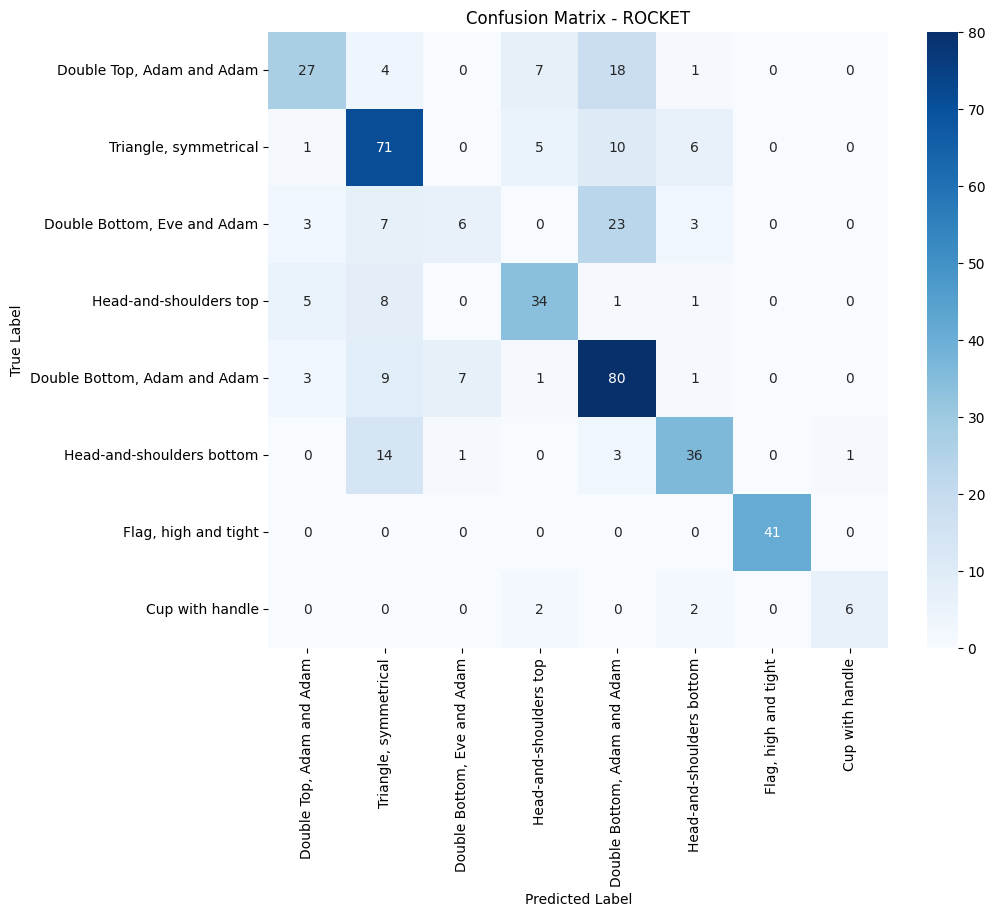

Training and testing classifier: MiniROCKET
MiniROCKET Training Time: 20.76 seconds
MiniROCKET Prediction Time: 2.62 seconds
MiniROCKET Accuracy: 0.62


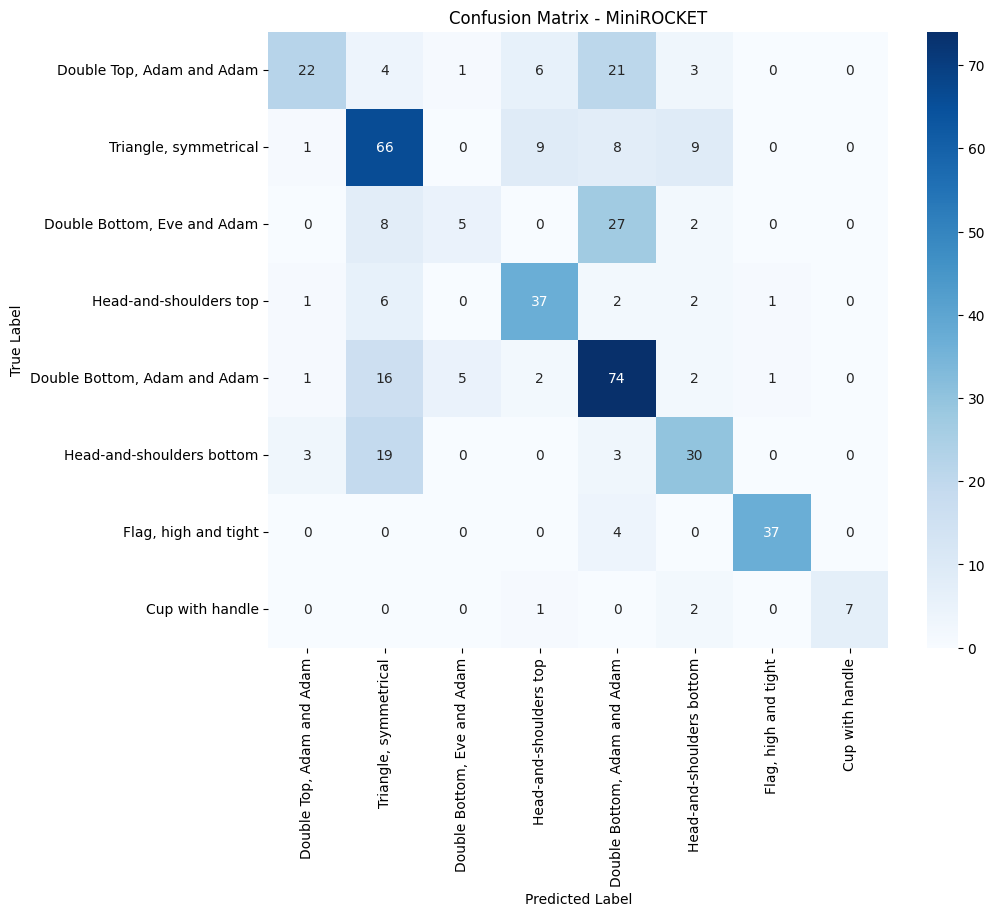

Training and testing classifier: MultiROCKET
MultiROCKET Training Time: 134.48 seconds
MultiROCKET Prediction Time: 34.90 seconds
MultiROCKET Accuracy: 0.64


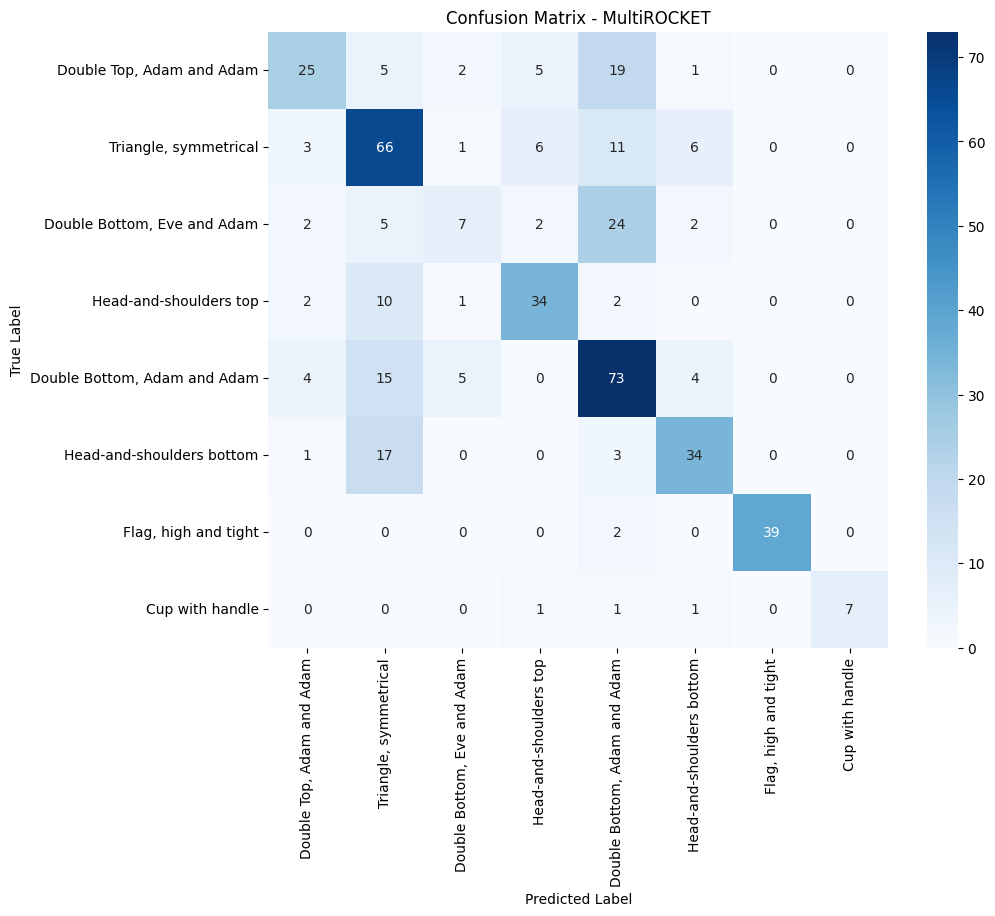

Training and testing classifier: InceptionTime
InceptionTime Training Time: 13343.68 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
InceptionTime Prediction Time: 1.79 seconds
InceptionTime Accuracy: 0.02


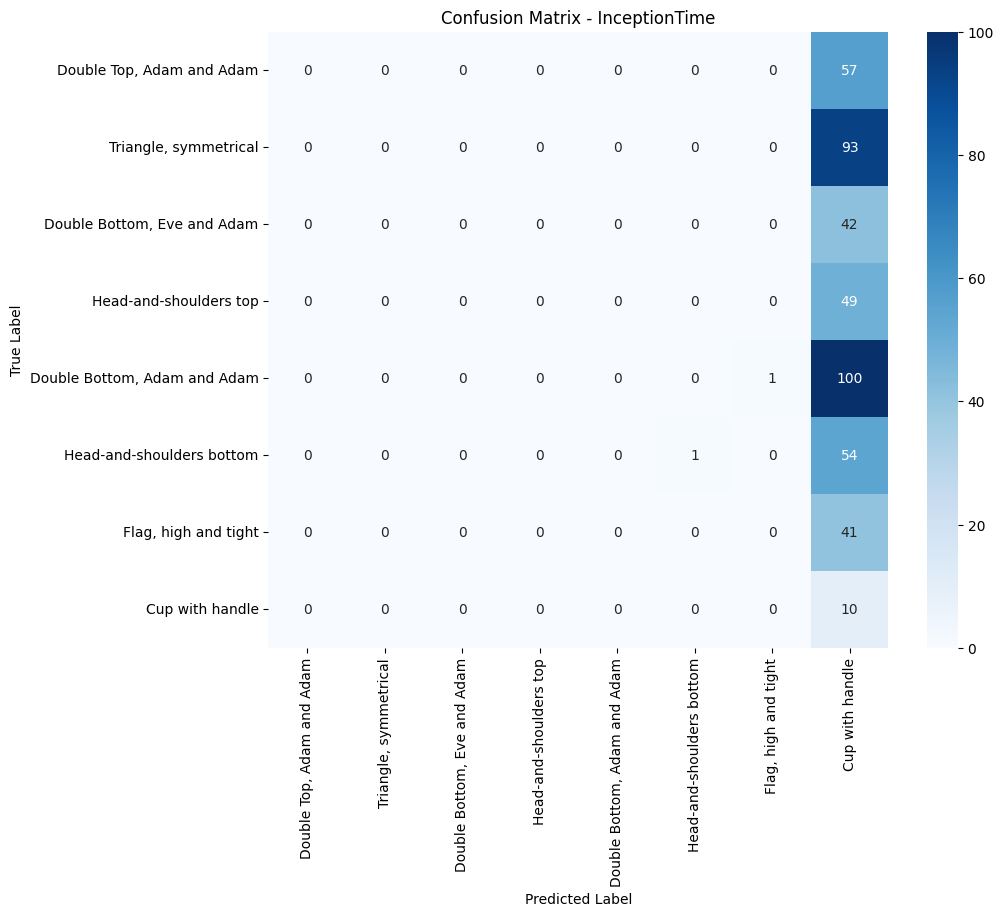

Training and testing classifier: ShapeletLearningTslearn


c:\Python312\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Python312\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


ShapeletLearningTslearn Training Time: 7283.60 seconds
ShapeletLearningTslearn Prediction Time: 91.48 seconds
ShapeletLearningTslearn Accuracy: 0.13


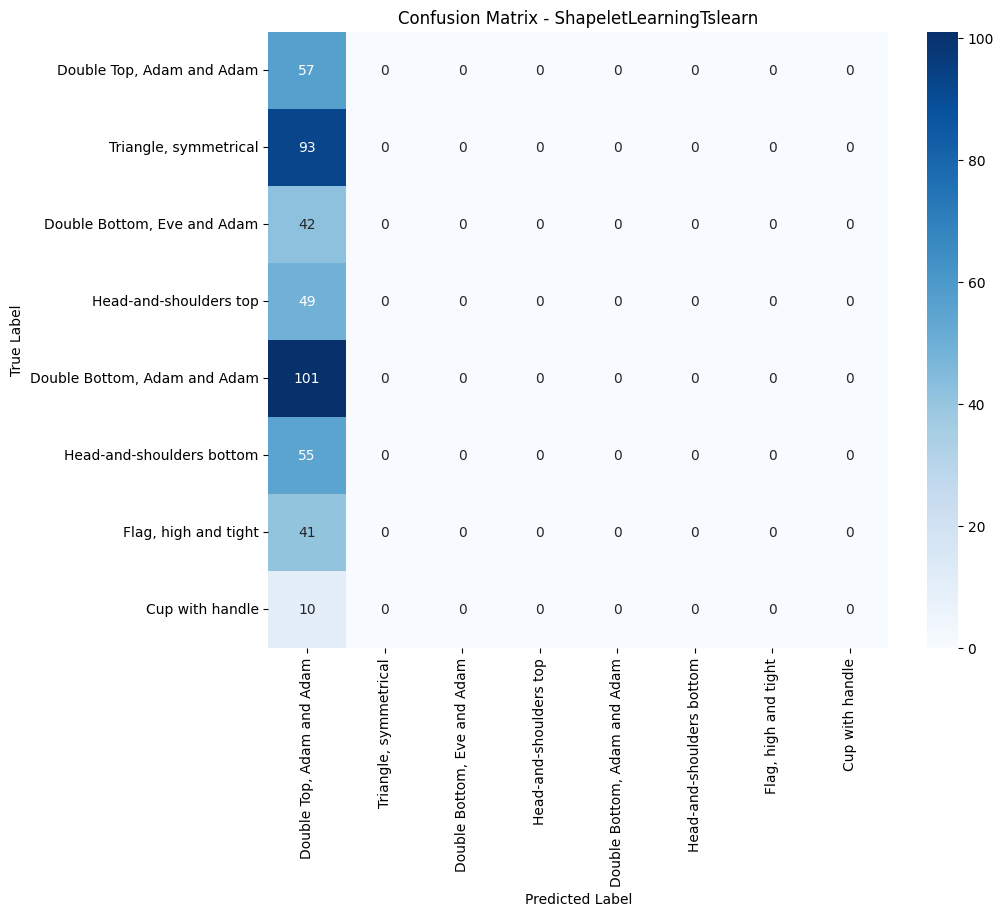

Training and testing classifier: HIVE-COTE


c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will

HIVE-COTE Training Time: 61967.96 seconds


c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


HIVE-COTE Prediction Time: 983.18 seconds
HIVE-COTE Accuracy: 0.68


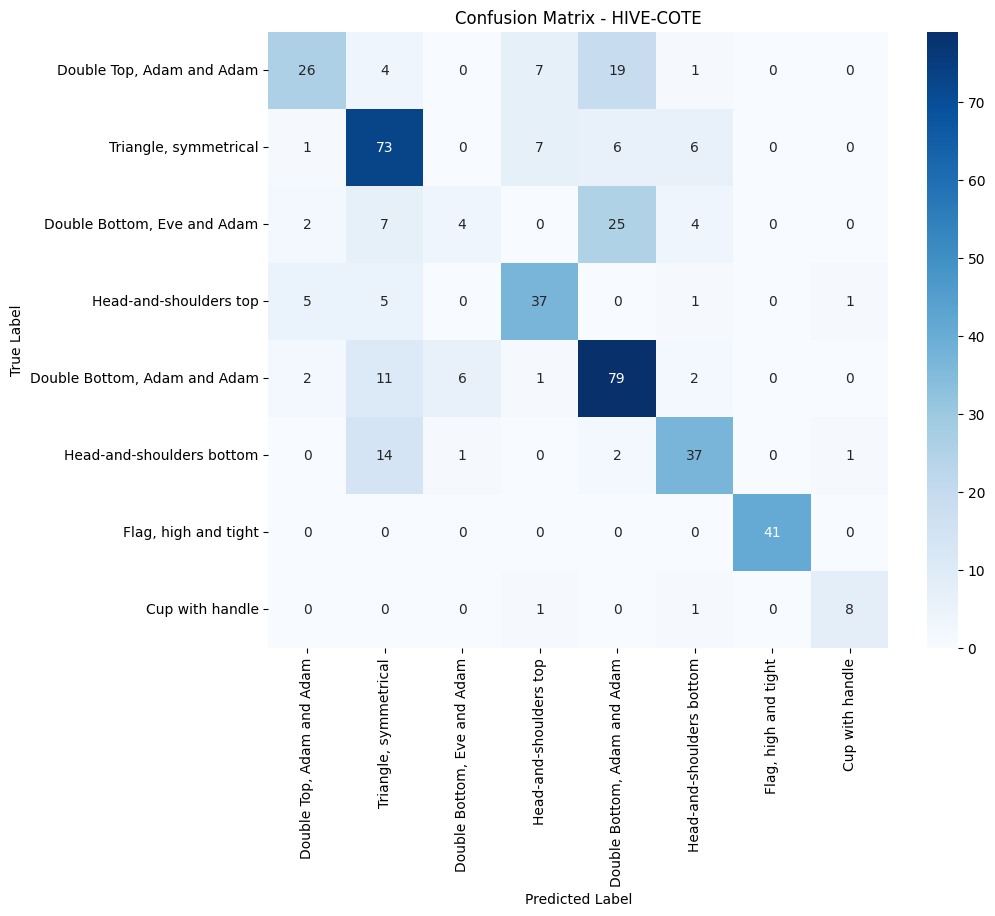

Training and testing classifier: DrCIF


c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will

DrCIF Training Time: 14641.10 seconds


c:\Python312\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


DrCIF Prediction Time: 143.37 seconds
DrCIF Accuracy: 0.65


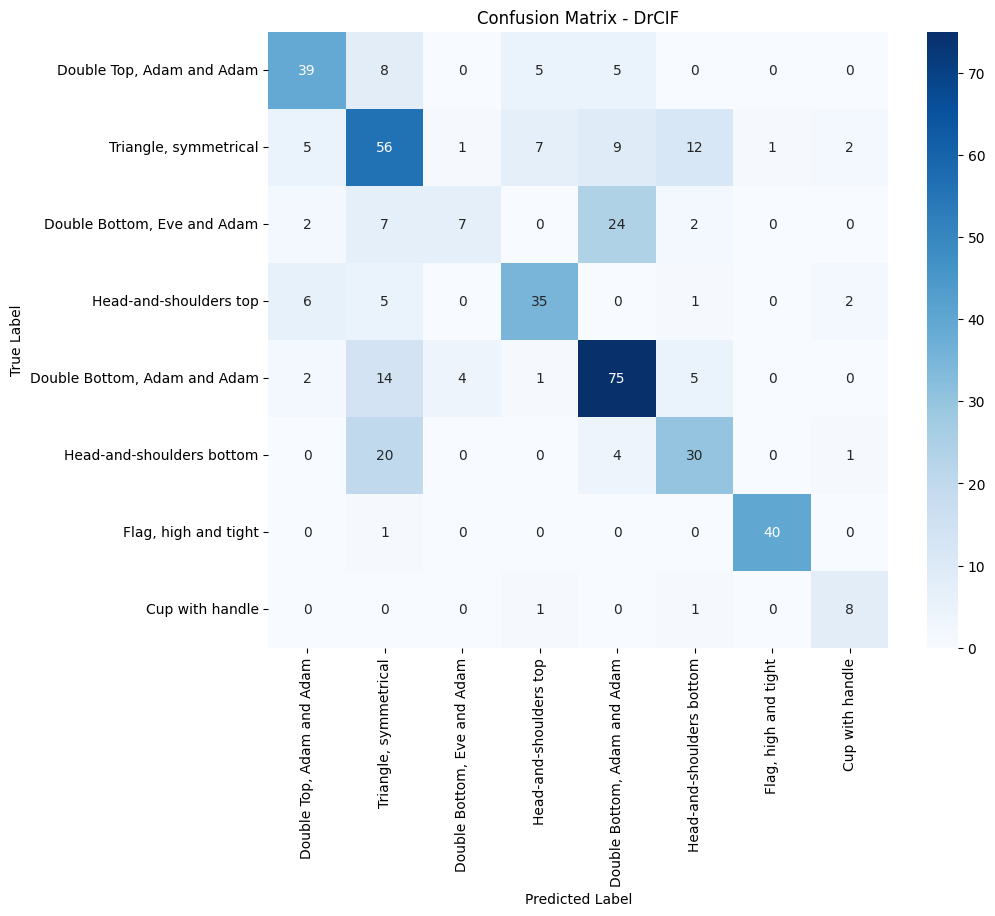

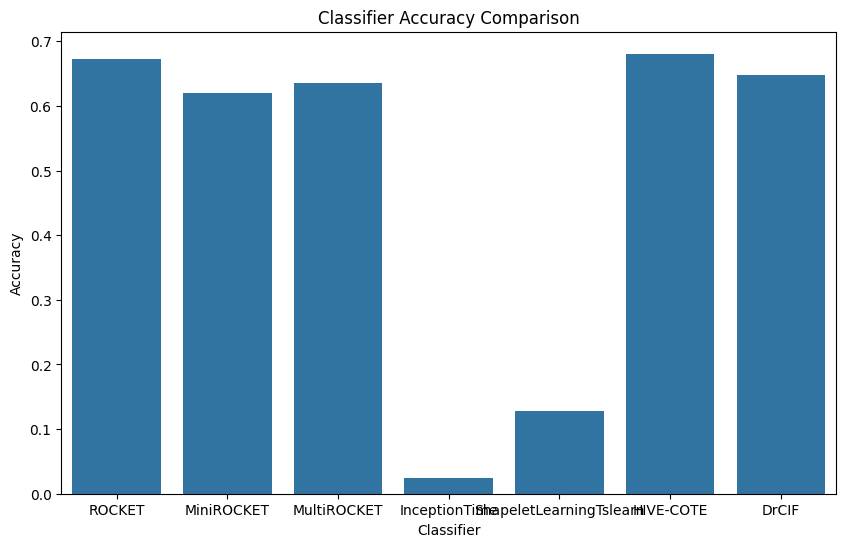


ROCKET Results:
Accuracy: 0.67
Training Time: 245.95 seconds
Prediction Time: 31.65 seconds

MiniROCKET Results:
Accuracy: 0.62
Training Time: 20.76 seconds
Prediction Time: 2.62 seconds

MultiROCKET Results:
Accuracy: 0.64
Training Time: 134.48 seconds
Prediction Time: 34.90 seconds

InceptionTime Results:
Accuracy: 0.02
Training Time: 13343.68 seconds
Prediction Time: 1.79 seconds

ShapeletLearningTslearn Results:
Accuracy: 0.13
Training Time: 7283.60 seconds
Prediction Time: 91.48 seconds

HIVE-COTE Results:
Accuracy: 0.68
Training Time: 61967.96 seconds
Prediction Time: 983.18 seconds

DrCIF Results:
Accuracy: 0.65
Training Time: 14641.10 seconds
Prediction Time: 143.37 seconds


In [14]:
import os
import time
import joblib
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.shapelet_based import ShapeletLearningClassifierTslearn
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.deep_learning import InceptionTimeClassifier
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.interval_based import DrCIF
from sktime.transformations.panel.padder import PaddingTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classifiers to test (with correct MiniRocket and MultiRocket setup)
classifiers = {
    "ROCKET": RocketClassifier(rocket_transform='rocket'),
    "MiniROCKET": RocketClassifier(rocket_transform='minirocket'),
    "MultiROCKET": RocketClassifier(rocket_transform='multirocket'),  # MultiRocket definition
    "InceptionTime": InceptionTimeClassifier(),
    'ShapeletLearningTslearn': ShapeletLearningClassifierTslearn(),
    "HIVE-COTE": HIVECOTEV2(),
    "DrCIF": DrCIF()
}

# Initialize a dictionary to store results
results = {}

# Create folder for saving trained models
model_save_dir = 'test_models'
os.makedirs(model_save_dir, exist_ok=True)

# Iterate over classifiers
for name, clf in classifiers.items():
    print(f"Training and testing classifier: {name}")
    
    # Initialize a Padding Transformer
    padder = PaddingTransformer()

    # Apply padding and fit the classifier
    pipeline = padder * clf
    
    # Fit the classifier and save the trained model
    start_time_train = time.time()
    pipeline.fit(X_train, y_train)
    end_time_train = time.time()
    train_duration = end_time_train - start_time_train
    print(f"{name} Training Time: {train_duration:.2f} seconds")
    
    # Save the trained model
    joblib.dump(pipeline, os.path.join(model_save_dir, f"{name}_model.pkl"))
    
    # Measure prediction time
    start_time_predict = time.time()
    y_pred = pipeline.predict(X_test)
    end_time_predict = time.time()
    predict_duration = end_time_predict - start_time_predict
    print(f"{name} Prediction Time: {predict_duration:.2f} seconds")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store results
    results[name] = {
        "accuracy": accuracy,
        "y_pred": y_pred,
        "train_duration": train_duration,
        "predict_duration": predict_duration
    }

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame from the confusion matrix (adjusting to your 'pattern_encoding' if needed)
    cm_df = pd.DataFrame(cm, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Display final accuracy comparison
accuracy_results = {name: result["accuracy"] for name, result in results.items()}
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Classifier", "Accuracy"])

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier", y="Accuracy", data=accuracy_df)
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Print detailed timing results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Training Time: {result['train_duration']:.2f} seconds")
    print(f"Prediction Time: {result['predict_duration']:.2f} seconds")


# Data Augment


In [ ]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt



# Define a linear trend function (y = a*x + b)
def linear_trend(x, slope=0.1, intercept=0):
    return slope * x + intercept

# Define a non-linear (quadratic) trend function (y = a*x^2 + b*x + c)
def quadratic_trend(x, a=0.001, b=0.01, c=0):
    return a * x**2 + b * x + c

# Define a sine wave trend function
def sine_trend(x, amplitude=0.02, frequency=0.05 ):
    return amplitude * np.sin(frequency * x)

def traindata_augment(Dataset):
    # Define the number of samples to generate
    n_total_samples = 300
    # Create a counter for generating new first-level indices
    new_first_level_counter = Dataset.index.get_level_values(0).max() + 1

    # Loop through the unique chart patterns in the Dataset
    for pattern in Dataset['Pattern'].unique():
        # Filter the Dataset for the current pattern
        pattern_data = Dataset[Dataset['Pattern'] == pattern]

        # Get the unique values from the first level of the multi-index
        unique_first_level_index = pattern_data.index.get_level_values(0).unique()

        # Set the number of augmented samples to create
        n_samples = n_total_samples - len(unique_first_level_index)

        # Loop through the number of samples to generate
        for i in range(n_samples):
            # Randomly select a section of the DataFrame based on the first-level index
            random_first_level_value = np.random.choice(unique_first_level_index)
            random_section = pattern_data.loc[(random_first_level_value, slice(None)), :]

            # Get the difference between max and min of Close column
            diff = random_section['Close'].max() - random_section['Close'].min()
            adjusted_diff = np.log(1 + diff)  # Adding 1 to avoid log(0)

            # Introduce randomness into the noise level
            noise_level = adjusted_diff * (0.08 + np.random.uniform(-0.01, 0.01))  # Adding random factor
            sub_noise_level = adjusted_diff * (0.01 + np.random.uniform(-0.004, 0.004))  # Adding random factor

            x_values = np.arange(len(random_section))

            # Randomly select a trend function
            trend_function = np.random.choice([linear_trend, quadratic_trend, sine_trend])

            print(f"\nSelected Chart Pattern: {pattern}")
            print(f"\nSelected Trend Function: {trend_function.__name__}")

            # Modify the trend function parameters based on price range and random factors
            if trend_function == linear_trend:
                slope = np.random.uniform(0.005, 0.05) * adjusted_diff * (0.4 + np.random.uniform(-0.01, 0.01))   # Slope depends on price difference
                trend = linear_trend(x_values, slope=slope)
                print('slope:', slope)
            elif trend_function == quadratic_trend:
                a = np.random.uniform(0.00001, 0.0005) * adjusted_diff * (0.4 + np.random.uniform(-0.01, 0.01))   # Quadratic coefficient scaled by diff
                b = np.random.uniform(0.001, 0.01) * adjusted_diff
                trend = quadratic_trend(x_values, a=a, b=b)
                print('a:', a, 'b:', b)
            else:  # sine_trend
                amplitude = np.random.uniform(0.05, 1.2) * adjusted_diff * (0.4 + np.random.uniform(-0.01, 0.01))   # Amplitude depends on price difference
                frequency = np.random.uniform(0.01, 1)
                trend = sine_trend(x_values, amplitude=amplitude, frequency=frequency)
                print('amplitude:', amplitude, 'frequency:', frequency)

            # # Plot the trend function
            # plt.figure(figsize=(10, 6))
            # plt.plot(x_values, trend, label=f'{trend_function.__name__}')
            # plt.title('Trend Function Plot')
            # plt.xlabel('x')
            # plt.ylabel('y')
            # plt.legend()
            # plt.grid(True)
            # plt.show()

            # Add random noise (minor noise level) for variation in individual OHLC points
            noise = np.random.normal(0, sub_noise_level, random_section[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].shape)
            noisy_data = random_section[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] + noise

            # Add consistent noise across the same row (major noise level)
            row_noise = np.random.normal(0, noise_level, random_section[['Open']].shape)
            noisy_data['Open'] = random_section['Open'] + row_noise.squeeze()
            noisy_data['High'] = random_section['High'] + row_noise.squeeze()
            noisy_data['Low'] = random_section['Low'] + row_noise.squeeze()
            noisy_data['Close'] = random_section['Close'] + row_noise.squeeze()
            noisy_data['Adj Close'] = random_section['Adj Close'] + row_noise.squeeze()
            noisy_data['Volume'] = random_section['Volume'] + row_noise.squeeze()

            # Add the trend equally to all OHLC columns
            noisy_data['Open'] += trend
            noisy_data['High'] += trend
            noisy_data['Low'] += trend
            noisy_data['Close'] += trend
            noisy_data['Adj Close'] += trend
            noisy_data['Volume'] += trend  # You can adjust the impact of the trend on Volume if needed

            # Assign new first-level index to the noisy_data
            new_first_level_index = pd.MultiIndex.from_product([[new_first_level_counter], random_section.index.get_level_values(1)], names=['Index', 'Date'])
            noisy_data.index = new_first_level_index

            # Increment the first-level counter for the next sample
            new_first_level_counter += 1

            # Visualize the original and noisy data using candlestick charts
            
            # # Prepare original and noisy data for plotting (OHLC only)
            # original_data_for_plot = random_section[['Open', 'High', 'Low', 'Close']].reset_index(drop=True)
            # augmented_data_for_plot = noisy_data[['Open', 'High', 'Low', 'Close']].reset_index(drop=True)

            # # Create two subplots to compare original and noisy data
            # fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            # # Create a DatetimeIndex for the plots (ensure it matches the number of rows in the data)
            # date_range = pd.date_range(start='2024-01-01', periods=len(original_data_for_plot), freq='D')

            # # Assign the index to the original and noisy data for plotting
            # original_data_for_plot.index = date_range
            # augmented_data_for_plot.index = date_range

            # # Plot the original data
            # mpf.plot(original_data_for_plot, type='candle', ax=axes[0], style='yahoo', volume=False)
            # axes[0].grid(True)  # Enable gridlines
            # axes[0].set_title("Original OHLC Candlestick Chart")

            # # Plot the noisy data (augmented with trend)
            # mpf.plot(augmented_data_for_plot, type='candle', ax=axes[1], style='yahoo', volume=False)
            # axes[1].grid(True)  # Enable gridlines
            # axes[1].set_title("Augmented OHLC Candlestick Chart with Trend")

            # # Show the comparison plots
            # plt.tight_layout()
            # plt.show()
            
            # add Pattern column to the noisy data
            noisy_data['Pattern'] = pattern

            # Concatenate the noisy data to the original Dataset
            Dataset = pd.concat([Dataset, noisy_data], axis=0)

    return Dataset



In [ ]:
# augment train dataset
trainDataset_aug = traindata_augment(trainDataset)

# shape of the augmented train dataset
print(f'Training Set Shape: {trainDataset_aug.shape}')


Selected Chart Pattern: 6

Selected Trend Function: sine_trend
amplitude: 0.7449097936951382 frequency: 0.35625343293080297

Selected Chart Pattern: 6

Selected Trend Function: sine_trend
amplitude: 0.7125419090664166 frequency: 0.49437415875966606

Selected Chart Pattern: 6

Selected Trend Function: sine_trend
amplitude: 0.27912848819127756 frequency: 0.6119661995519318

Selected Chart Pattern: 6

Selected Trend Function: sine_trend
amplitude: 1.3502969061163141 frequency: 0.7664931722831632

Selected Chart Pattern: 6

Selected Trend Function: quadratic_trend
a: 8.4642577033915e-05 b: 0.0031199366209922587

Selected Chart Pattern: 6

Selected Trend Function: quadratic_trend
a: 0.00015438012678817455 b: 0.007151045966883746

Selected Chart Pattern: 6

Selected Trend Function: sine_trend
amplitude: 0.20970569251587473 frequency: 0.17492891435851665

Selected Chart Pattern: 6

Selected Trend Function: sine_trend
amplitude: 0.9871228612862208 frequency: 0.5894702497753741

Selected Chart

# Rocket test after augment


In [ ]:
# Create a temporary DataFrame with level 0 indexes and the 'Pattern' column
temp_df = trainDataset_aug.reset_index(level=0)  # Resetting level 1 index to create a flat DataFrame
# drop all the columns except the 'Pattern' column and the Level_0 column
temp_df = temp_df[['level_0','Pattern']]

# drop all the duplicate rows in the temp_df dataframe
temp_df = temp_df.drop_duplicates()

# get the number of each unique value in the 'Pattern' column
pattern_counts = temp_df['Pattern'].value_counts()
print(pattern_counts)

Pattern
4    401
1    364
6    300
3    300
5    300
2    300
0    300
7    300
Name: count, dtype: int64


In [ ]:
X_train_aug = trainDataset_aug.drop(columns='Pattern')
y_train_aug = trainDataset_aug['Pattern']

# drop level 1 indexes from y_train_aug
y_train_aug = y_train_aug.droplevel(1)
# now group the y_train_aug by their indexes
y_train_aug = y_train_aug.groupby(y_train_aug.index).first()

# Display the shapes of the training and testing sets
print(f"X_train_aug Shape: {X_train_aug.shape}, y_train_aug Shape: {y_train_aug.shape}")

# check if the data types are correct
check_is_mtype(X_train_aug, mtype="pd-multiindex", return_metadata=True)


X_train_aug Shape: (95605, 6), y_train_aug Shape: (2565,)


(True,
 None,
 {'is_univariate': False,
  'is_empty': False,
  'has_nans': False,
  'n_features': 6,
  'feature_names': ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
  'dtypekind_dfip': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'feature_kind': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'n_instances': 2565,
  'is_one_series': False,
  'is_equal_length': False,
  'is_equally_spaced': True,
  'n_panels': 1,
  'is_one_panel': True,
  'mtype': 'pd-multiindex',
  'scitype': 'Panel'})

Accuracy: 0.69


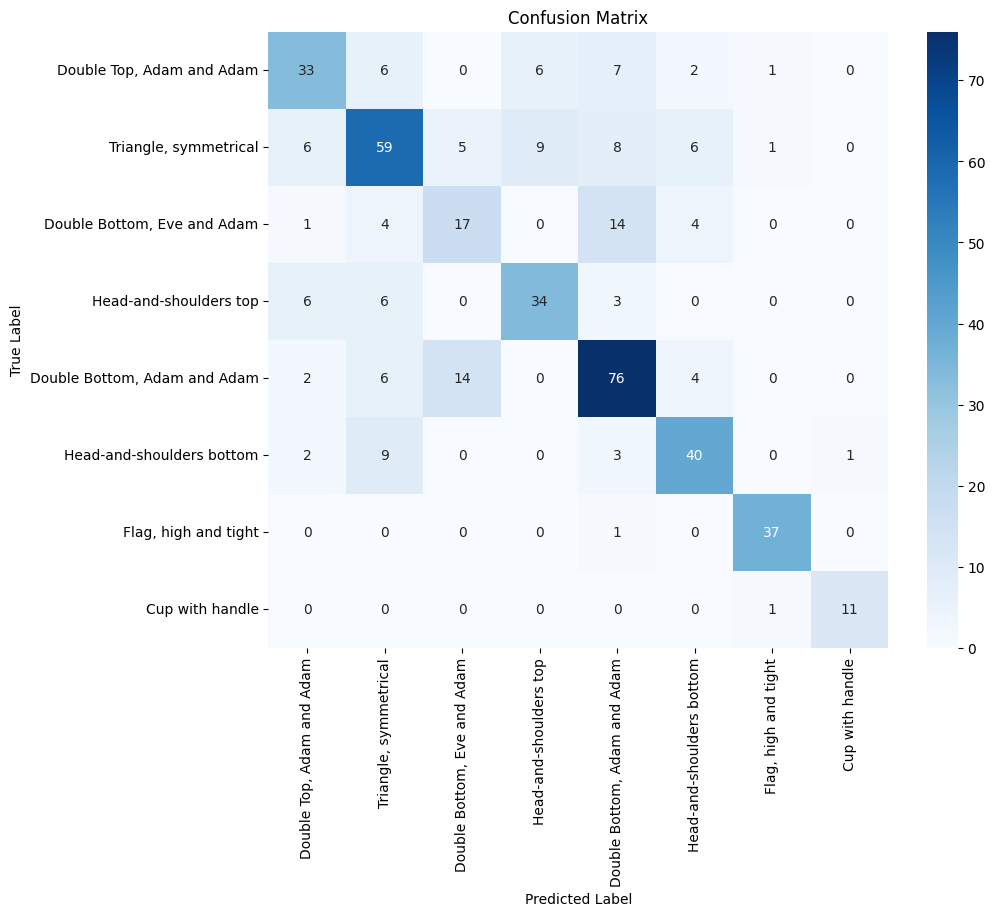

In [ ]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.padder import PaddingTransformer
from sktime.datasets import load_unit_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

my_padded_multi_rocket_aug = PaddingTransformer() * RocketClassifier(rocket_transform='multirocket')
my_padded_multi_rocket_aug.fit(X_train_aug, y_train_aug)
y_pred_multi_aug = my_padded_multi_rocket_aug.predict(X_test) 

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_multi_aug)
print(f"Accuracy: {accuracy:.2f}")

# Create the confusion matrix
cm3 = confusion_matrix(y_test, y_pred_multi_aug)

# Create a DataFrame from the confusion matrix
cm_df3 = pd.DataFrame(cm3, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df3, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
